<a href="https://colab.research.google.com/github/Kousikdutta1/Cardiovascular-Risk-Prediction/blob/main/Kousik_Dutta_Cardiovascular_Risk_Prediction_Capstone_Project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**<u>Project Title : Cardiovascular Risk Prediction</u>**

##<b> Problem Description </b>

###<b>The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD). The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes. Variables Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk factors.</b>


## **Introduction**

**Cardiovascular diseases (CVDs) are the leading cause of death globally, according to WHO, an estimated 17.9 million people died from CVDs in 2019, accounting for 32% of all global fatalities. Though CVDs cannot be treated, predicting the risk of the disease and taking the necessary precautions and medications can help to avoid severe symptoms and in some cases, even death.
As a result, it is critical that we accurately predict the risk of heart disease in order to avoid as many fatalities as possible.**

**Here I will try to implement various machine learning algorithm to predict this classification problem. The content of the notebook includes :-**

* **Data Preparation**
* **Exploratory Data Analysis**



#**Data Preparation**

###**1. Importing the Libraries and the Dataset :**

**Let's Start Our Journey by Importing and Inspecting the Dataset**

In [1]:
# Importing Required Libraries for our analysis 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report, roc_curve
from sklearn.metrics import make_scorer, recall_score, f1_score

from imblearn.combine import SMOTETomek

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBRFClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor

# To avoid unnecessary warnings, let's import warnings also
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Let's define url path of the dataset

path = '/content/drive/MyDrive/Colab Notebooks/Cardiovascular Risk Prediction - Kousik Dutta/Copy of data_cardiovascular_risk.csv'

# Now let's import dataset to create a dataframe

cvdf = pd.read_csv(path)

###**2. Understanding the Dataset**

In [3]:
# Let's check the shape of the dataframe

print('Shape of the dataset is :', cvdf.shape)

Shape of the dataset is : (3390, 17)


* **In our dataset we have 3390 rows and 17 columns.**

In [4]:
# Checking all the columns present in our dataset

cvdf.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [5]:
# Checking top 5 records in DataFrame

cvdf.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [6]:
# Checking bottom 5 records in DataFrame

cvdf.tail()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,3389,54,3.0,F,NO,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


In [7]:
# Let's check the datatypes and null values of the dataset

cvdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [8]:
# Let's check the statistical description of the dataset

cvdf.describe(include = 'all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,3390.0,NaN,NaN,NaN,1694.5,978.753033,0.0,847.25,1694.5,2541.75,3389.0
age,3390.0,NaN,NaN,NaN,49.542183,8.592878,32.0,42.0,49.0,56.0,70.0
education,3303.0,NaN,NaN,NaN,1.970936,1.019081,1.0,1.0,2.0,3.0,4.0
sex,3390,2,F,1923,NaN,NaN,NaN,NaN,NaN,NaN,NaN
is_smoking,3390,2,NO,1703,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cigsPerDay,3368.0,NaN,NaN,NaN,9.069477,11.879078,0.0,0.0,0.0,20.0,70.0
BPMeds,3346.0,NaN,NaN,NaN,0.029886,0.170299,0.0,0.0,0.0,0.0,1.0
prevalentStroke,3390.0,NaN,NaN,NaN,0.00649,0.080309,0.0,0.0,0.0,0.0,1.0
prevalentHyp,3390.0,NaN,NaN,NaN,0.315339,0.464719,0.0,0.0,0.0,1.0,1.0
diabetes,3390.0,NaN,NaN,NaN,0.025664,0.158153,0.0,0.0,0.0,0.0,1.0


###**3. Data Description**

###**Demographic ▶**

* **Sex:** male or female("M" or "F")
* **Age:** Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous).
* **Education:** The level of education of the patient (categorical values - 1,2,3,4)

###**Behavioral ▶**

* **is_smoking:** whether or not the patient is a current smoker ("YES" or "NO").
* **Cigs Per Day:** the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette).

###**Medical( history ) ▶**

* **BP Meds:** whether or not the patient was on blood pressure medication (Nominal).
* **Prevalent Stroke:** whether or not the patient had previously had a stroke (Nominal).
* **Prevalent Hyp:** whether or not the patient was hypertensive (Nominal).
* **Diabetes:** whether or not the patient had diabetes (Nominal).

###**Medical(current) ▶**

* **Tot Chol:** total cholesterol level (Continuous).
* **Sys BP:** systolic blood pressure (Continuous).
* **Dia BP:** diastolic blood pressure (Continuous).
* **BMI:** Body Mass Index (Continuous).
* **Heart Rate:** heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values).
* **Glucose:** glucose level (Continuous)

###**Target variable ▶**
* **10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”).** 

###**4. Missing Value Analysis**

In [9]:
#  Let's check the total missing data 

cvdf.isnull().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

* **It can be seen from above that there are missing data in our dataset.**

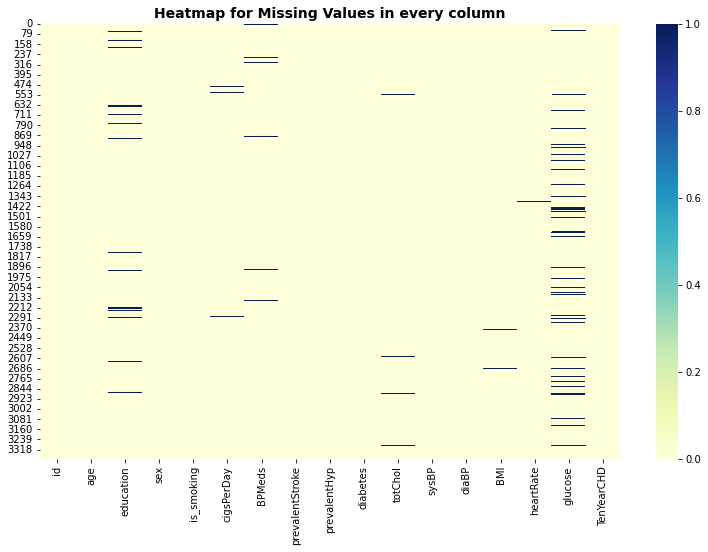

In [10]:
# Checking for missing values in our dataset with the help of heatmap.

plt.figure(figsize = (13,8))
sns.heatmap(cvdf.isnull(), cmap = 'YlGnBu')
plt.title('Heatmap for Missing Values in every column',weight = 'bold', fontsize = 14)
plt.show();


In [11]:
# Percentage of missing data per category

Total_missing_data = cvdf.isnull().sum().sort_values(ascending = False)
Total_percentage = (cvdf.isnull().sum() / cvdf.isnull().count()).sort_values(ascending = False) * 100
missing_data_concat = pd.concat([Total_missing_data, round((Total_percentage),2)], axis = 1, keys = ["Total No of Missing Values", "Percentage of Missing Values"])
missing_data = missing_data_concat[missing_data_concat['Total No of Missing Values']>0]
missing_data

,Total No of Missing Values,Percentage of Missing Values
glucose,304,8.97
education,87,2.57
BPMeds,44,1.30
totChol,38,1.12
cigsPerDay,22,0.65
BMI,14,0.41
heartRate,1,0.03


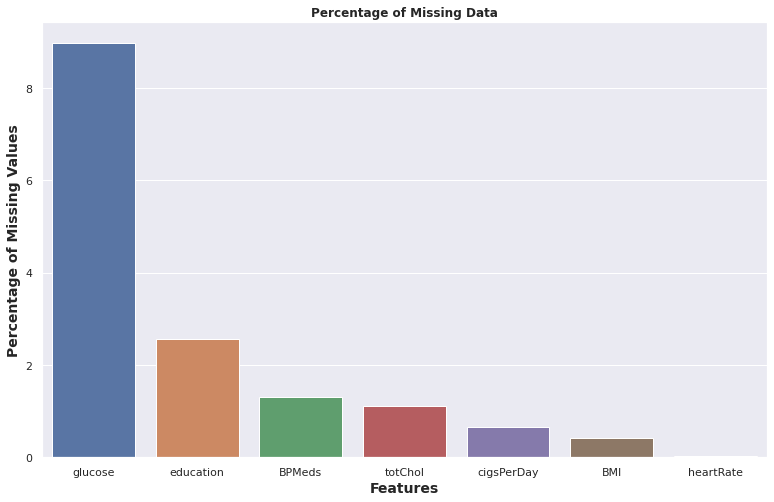

In [12]:
# Let's visualize the percentage of missing values

plt.figure(figsize = (13,8))
sns.set(style = 'darkgrid')
sns.barplot(x = missing_data.index, y = missing_data['Percentage of Missing Values'], data = missing_data)
plt.title('Percentage of Missing Data', weight = 'bold')
plt.xlabel('Features', fontsize = 14, weight = 'bold')
plt.ylabel('Percentage of Missing Values', fontsize = 14, weight = 'bold')
plt.show();


* **As we can see from above 'Glucose', 'Education', 'BPMeds' , 'totChol', 'CigsPerDay', 'BMI', 'Heartrate' - these features are having missing values. We will treat them as we go ahead in our analysis.**

In [13]:
# Total Number of Null Values

print("Total number of null values in the data set : "  , cvdf.isna().sum().sum())

# Let's count all the rows which contain missing values

count = 0
for i in cvdf.isna().sum(axis = 1) :
  if i>0 :
    count = count + 1
print('Total number of rows with missing values is ', count)
print(f'Percentage of rows which are having missing values in the entire datset : { round((count/ len(cvdf.index))*100, 2) } %')


Total number of null values in the data set :  510
Total number of rows with missing values is  463
Percentage of rows which are having missing values in the entire datset : 13.66 %


###**5. Handling Missing Data :**

In [14]:
# Let's first check the total number of unique values in every feature of the dataset

for i in cvdf.columns.tolist() :
  print(f"Total number of unique values in '{i}' is : ", cvdf[i].nunique())

Total number of unique values in 'id' is :  3390
Total number of unique values in 'age' is :  39
Total number of unique values in 'education' is :  4
Total number of unique values in 'sex' is :  2
Total number of unique values in 'is_smoking' is :  2
Total number of unique values in 'cigsPerDay' is :  32
Total number of unique values in 'BPMeds' is :  2
Total number of unique values in 'prevalentStroke' is :  2
Total number of unique values in 'prevalentHyp' is :  2
Total number of unique values in 'diabetes' is :  2
Total number of unique values in 'totChol' is :  240
Total number of unique values in 'sysBP' is :  226
Total number of unique values in 'diaBP' is :  142
Total number of unique values in 'BMI' is :  1259
Total number of unique values in 'heartRate' is :  68
Total number of unique values in 'glucose' is :  132
Total number of unique values in 'TenYearCHD' is :  2


**Let's replace the missing values in the categorical columns with the most frequent entries**

In [15]:
# Replacing the missing values in the categorical columns with its mode

cvdf['education'] = cvdf['education'].fillna(cvdf['education'].mode()[0])
cvdf['BPMeds'] = cvdf['BPMeds'].fillna(cvdf['BPMeds'].mode()[0])


In [16]:
# Let's check for the missing values in the categorical columns

print("Total missing values in column 'Education' after Mode imputation : " , cvdf['education'].isna().sum())

print("Total missing values in column 'BPMeds' after Mode imputation : " ,    cvdf['BPMeds'].isna().sum())

Total missing values in column 'Education' after Mode imputation :  0
Total missing values in column 'BPMeds' after Mode imputation :  0


**Let's check the distributions of the continuous variables and impute the missing values with mean or median**

In [17]:
# Let's first assign the variable names containing missing values

missing_cont_var = ['glucose', 'totChol', 'cigsPerDay', 'BMI', 'heartRate' ]

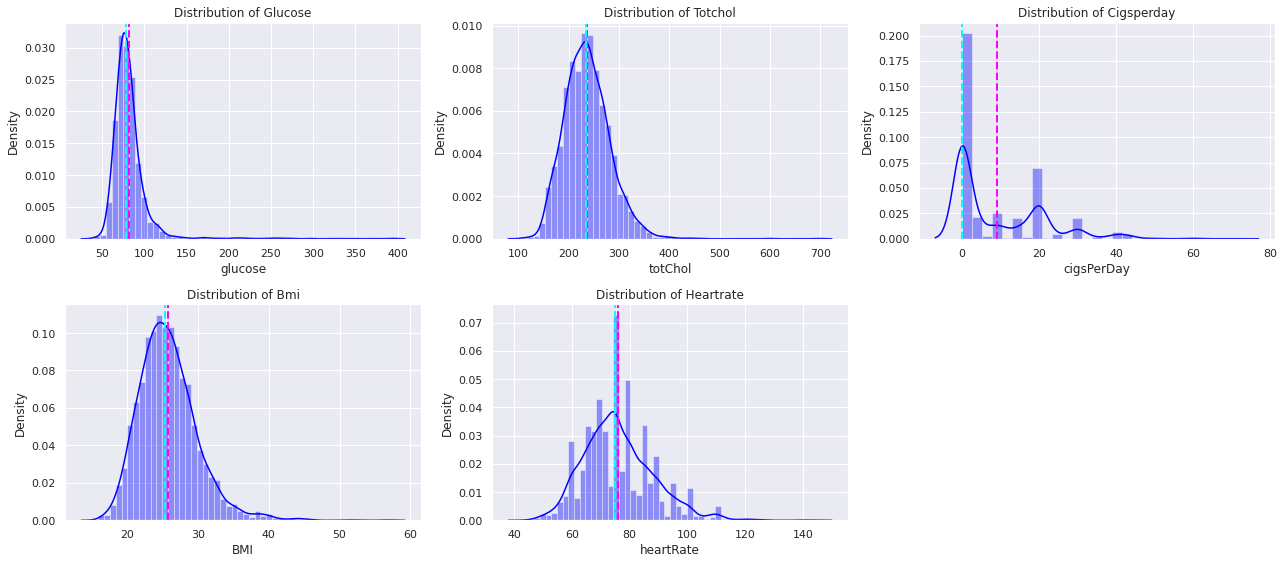

In [18]:
# Let's visualize the distribution plot of variables which contains missing values


fig = plt.figure(figsize = (18,8))
for index,column in enumerate(missing_cont_var) :
  plt.subplot(2,3,index+1)
  sns.distplot(cvdf[column], color = 'blue')
  feature = cvdf[column]
  ax = fig.gca()
  ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)
  plt.title(f'Distribution of {column.title()}')
  plt.tight_layout()

**As we can see from above that almost all the plots are skewed , so it would be better if we impute missing values with the help of median.**

In [19]:
# Let's replace the missing values with the help of median

for column in missing_cont_var :
  cvdf[column] = cvdf[column].fillna(cvdf[column].median())

In [20]:
# Let's check for missing values

cvdf.isna().sum()

id                 0
age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

**As we can see we have successfully handled all the missing values in the dataset**




#**Exploratory Data Analysis**

## **Let's do univariate analysis on different columns :**


**<u>' TenYearCHD ' - Dependent Variable**<u>

In [21]:
# Checking the value counts of the dependent variable

print("Vlaue count of 'TenYearCHD' :")
print("_ _"*20)
print('\n')
cvdf['TenYearCHD'].value_counts()

Vlaue count of 'TenYearCHD' :
_ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ _




0    2879
1     511
Name: TenYearCHD, dtype: int64

* **1 = Person have risk of coronary heart disease**


* **0 = Person do not have risk of coronary heart disease**

**There are 2879 patients without heart disease and 511 patients with the heart disease**




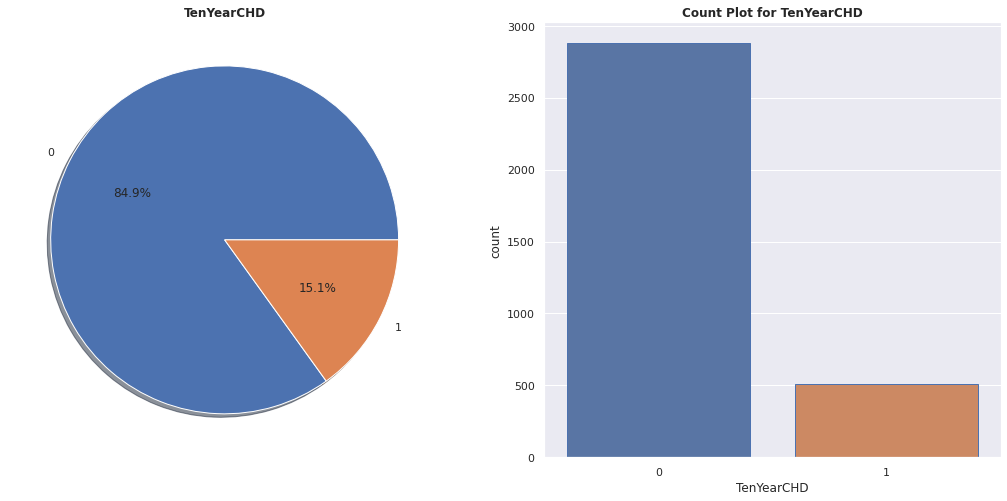

In [22]:
# Let's visualize the Target variable 


fig,axes = plt.subplots(1,2, figsize = (18,8))
cvdf['TenYearCHD'].value_counts().plot.pie(autopct = '%1.1f%%', ax = axes[0], shadow = True)
sns.countplot('TenYearCHD', data = cvdf, ax = axes[1], edgecolor = 'b')
axes[0].set_title('TenYearCHD', weight = 'bold')
axes[0].set_ylabel('')
axes[1].set_title('Count Plot for TenYearCHD', weight = 'bold')
plt.show();


* **As we can see from above that we have the imbalanced data set where number of people without the risk of coronary heart disease majorly exceeds the number of people those are having the risk of disease**

In [23]:
# Let's first drop the 'ID' column 

cvdf.drop(columns = ['id'], inplace = True)

**Let's check the discrete and continuous features :**

In [24]:
# Let's create to variables containing 'Categorical' and 'Numerical' features

Categorical_features = [i for i in cvdf.columns if cvdf[i].nunique() <= 4]
Numerical_features = [i for i in cvdf.columns if cvdf[i].nunique() > 4 ]

print(f'categorical features are : {Categorical_features}')
print(f'Numerical features are : {Numerical_features}')

categorical features are : ['education', 'sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'TenYearCHD']
Numerical features are : ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']


### **Let's analyze the distribution of the continuous independent features**

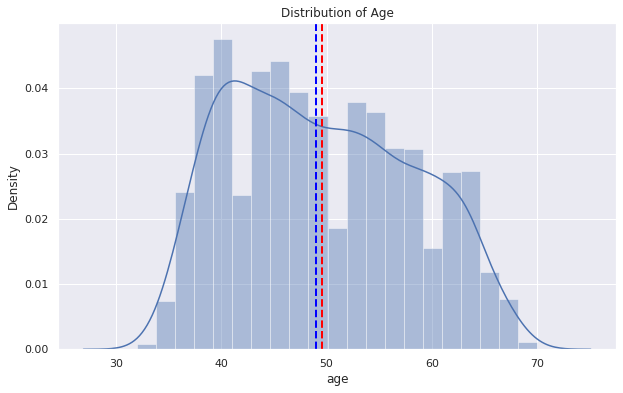

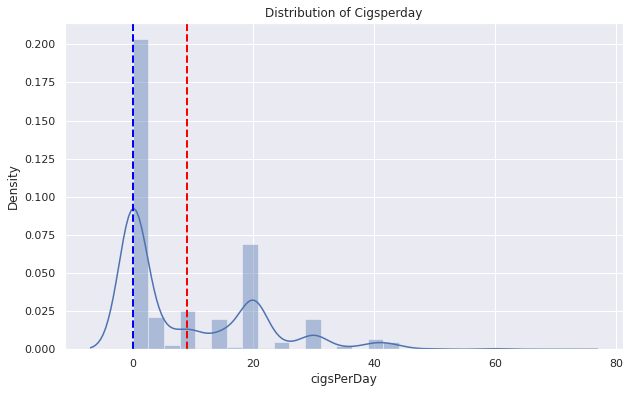

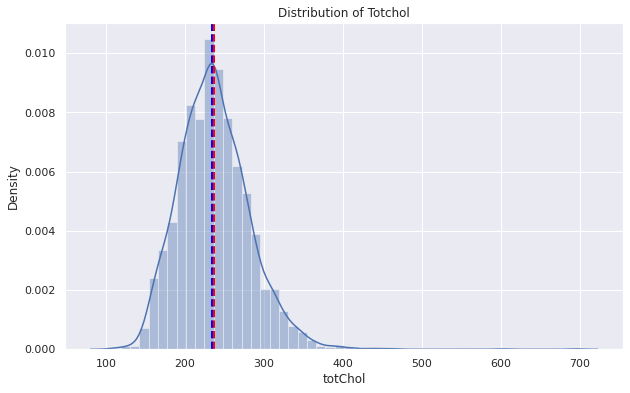

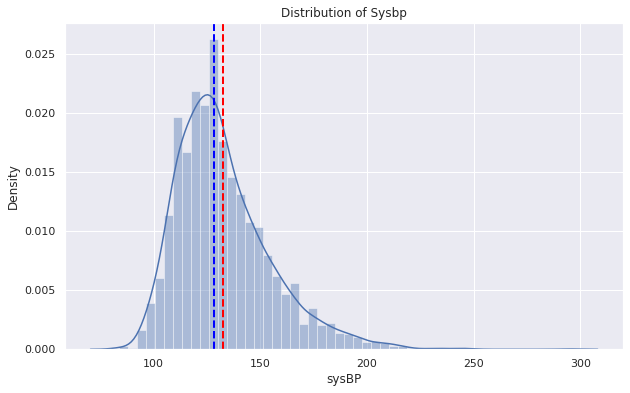

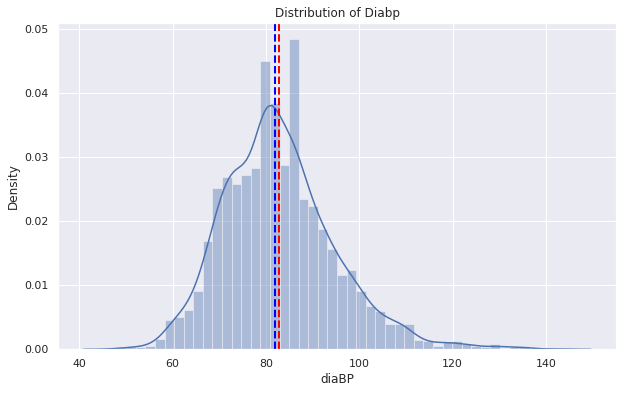

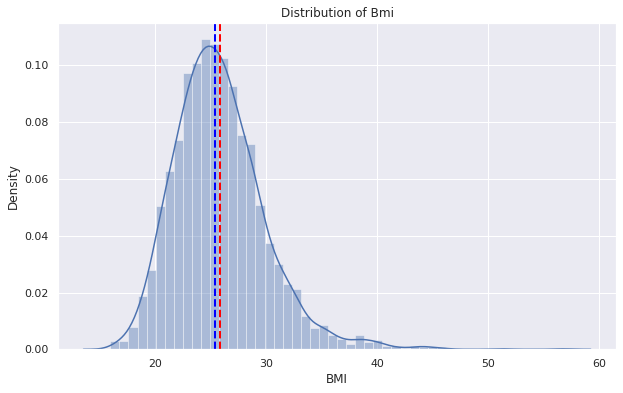

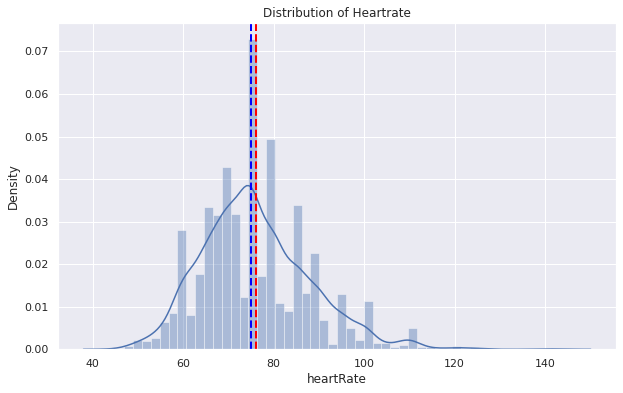

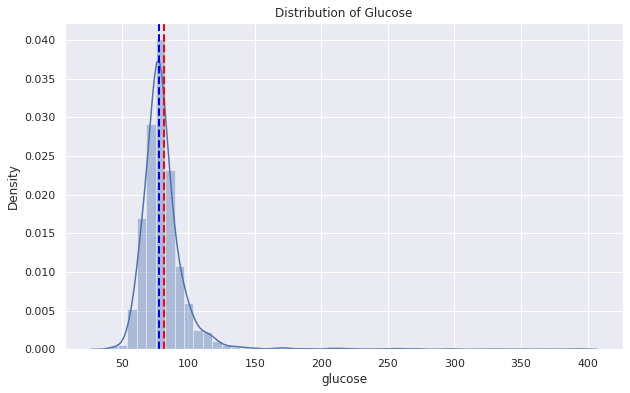

In [30]:
# Analyzing the distribution of the numerical features from the dataset

for column in Numerical_features :
  plt.figure(figsize=(10,6))
  sns.distplot(cvdf[column])
  plt.axvline(cvdf[column].mean(), color = 'red', linestyle = 'dashed', linewidth = 2)
  plt.axvline(cvdf[column].median(), color = 'blue', linestyle = 'dashed', linewidth =2)
  plt.title (f'Distribution of {column.title()}')
  plt.show();

* **As we can see from above plots that some of the variable are having skewed distribution , outliers needed to be treated for better analysis.**

###**Let's analyze the distribution of the Categorical independent features**

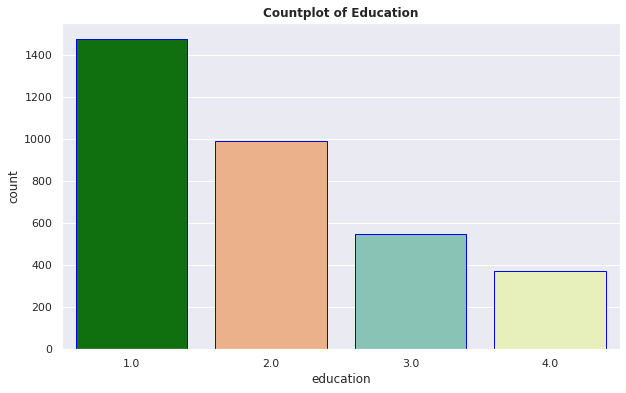

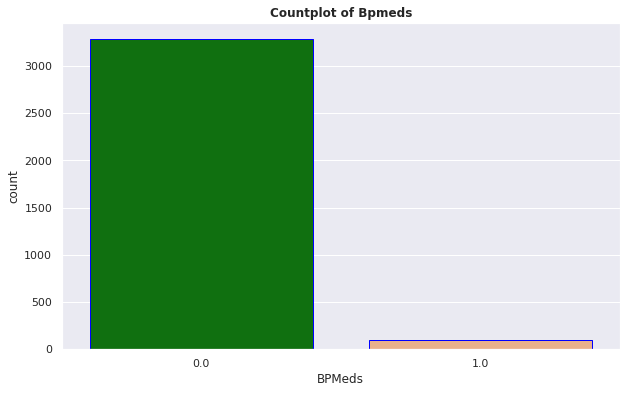

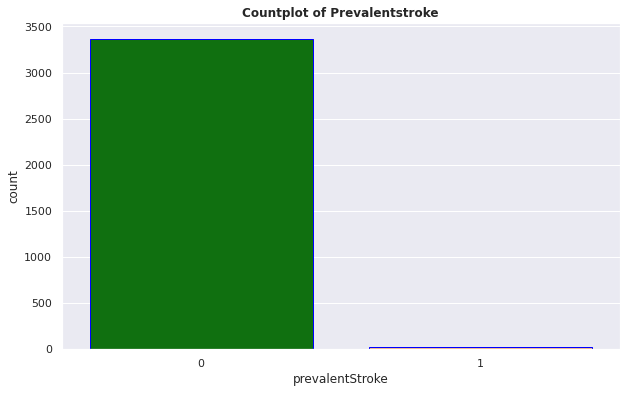

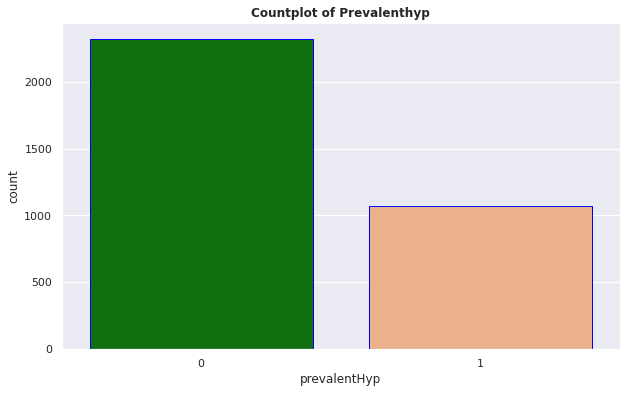

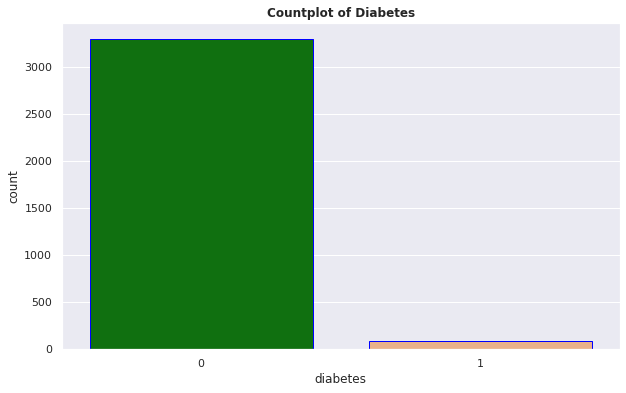

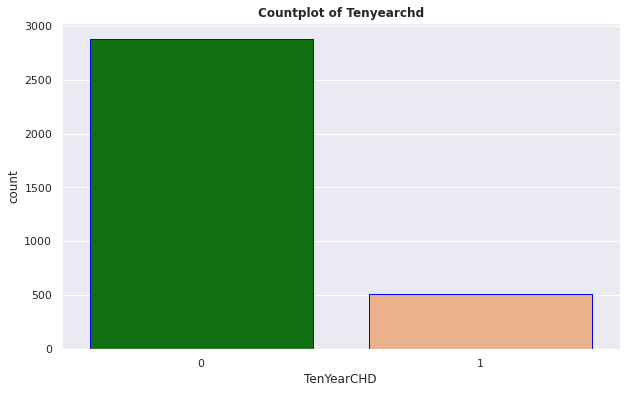

In [51]:
# Analyzing the distribution of the Categorical features from the dataset

for column in [i for i in Categorical_features if i not in ['sex', 'is_smoking']] :
  plt.figure(figsize=(10,6))
  sns.countplot( cvdf[column], edgecolor = 'blue',palette = ["green","#FAAE7B","#7fcdbb","#edf8b1"])
  plt.title (f'Countplot of {column.title()}', weight = 'bold')
  plt.show();

###**Handling Outliers**

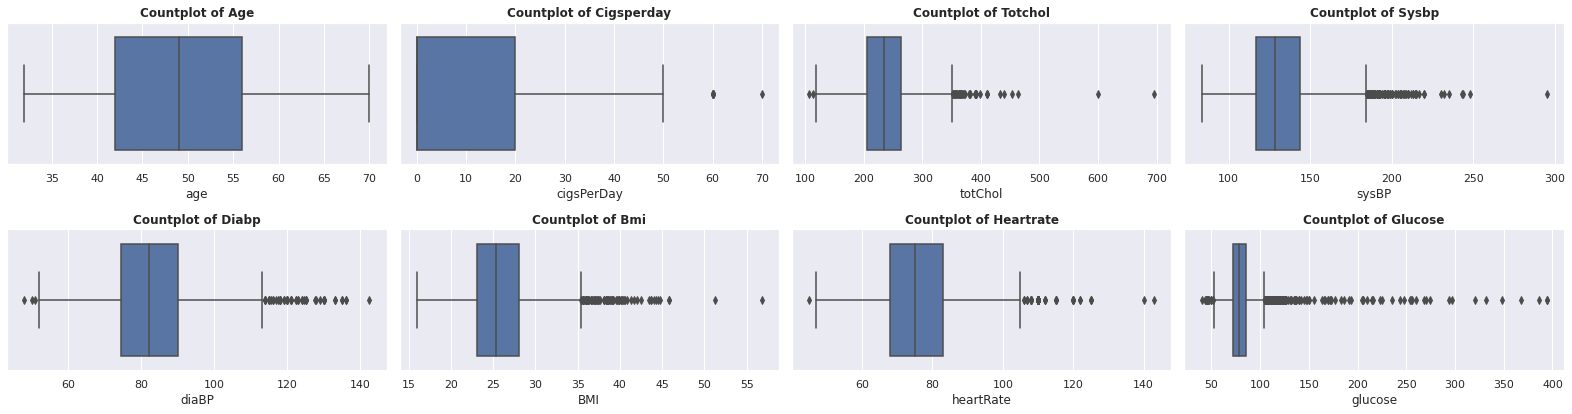

In [58]:
# Analyzing outliers of the Numerical features with the help of box plot

plt.figure(figsize = (22,14))
for index, column in enumerate(Numerical_features) :
  plt.subplot(5,4,index+1)
  sns.boxplot(cvdf[column])
  plt.title (f'Countplot of {column.title()}', weight = 'bold')
  plt.tight_layout()
plt.show();


* **As we can see from above plots that there are outliers in our dataset, so we will be treating them.**

In [60]:
# Removing outliers by standard methods

cv_df = cvdf.copy()
for column in Numerical_features :
  q1, q3, median = cv_df[column].quantile([0.25,0.75,0.5])
  lower_limit = q1 - 1.5 * (q3 - q1)
  upper_limit = q3 + 1.5 * (q3 - q1)

# Replacing outliers with median value
  cv_df[column] = np.where (cv_df[column] > upper_limit, median, 
                  np.where(cv_df[column] < lower_limit , median, cv_df[column]))


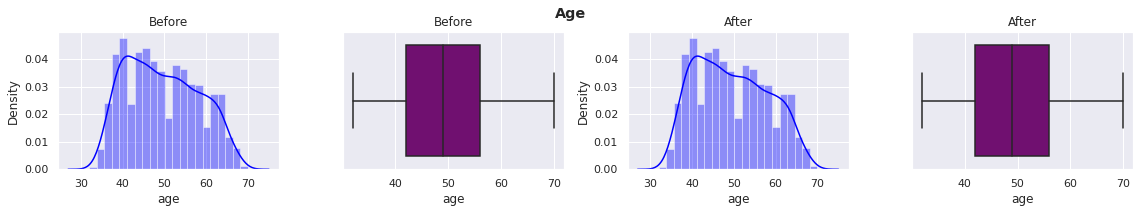

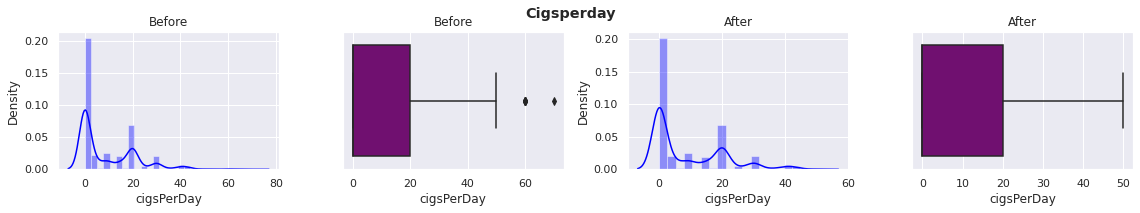

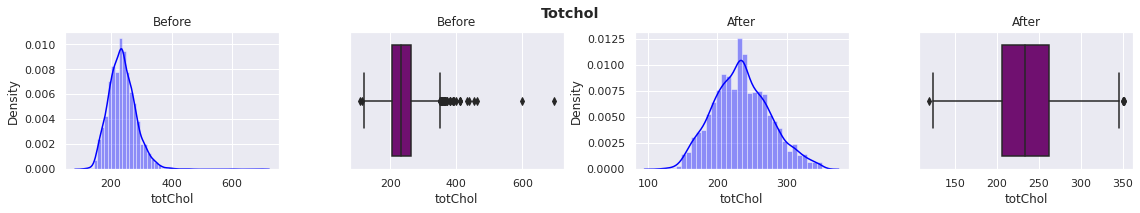

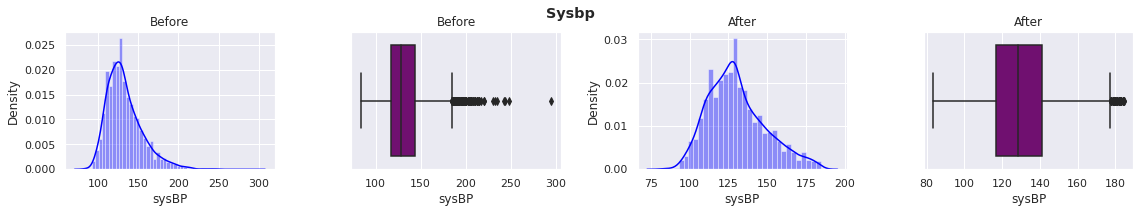

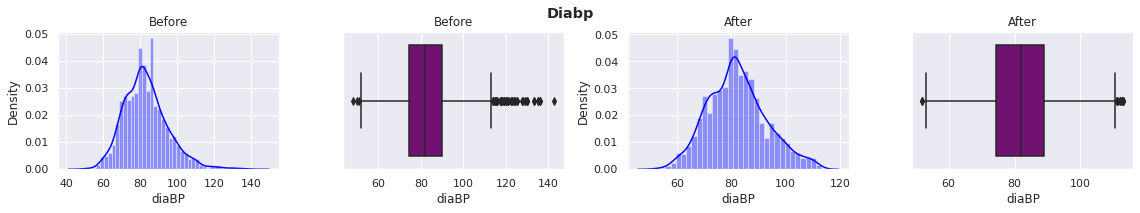

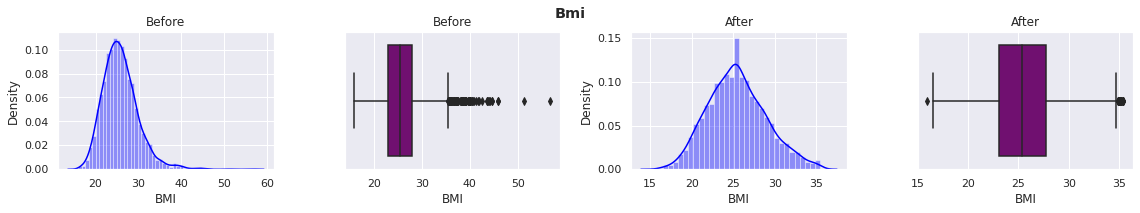

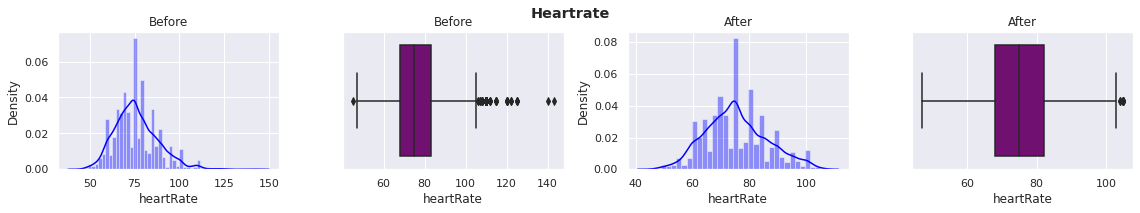

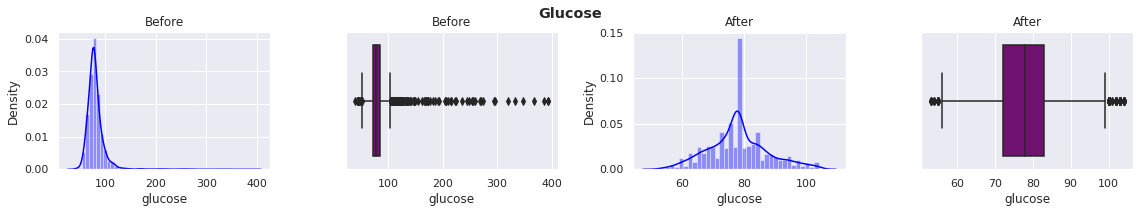

In [78]:

# Let's plot graphs before and after the outlier treatment

for column in Numerical_features :
  fig, axes = plt.subplots(1, 4, figsize= (16,3) )
  sns.distplot(cvdf[column], ax = axes[0], color = 'blue').set(title = 'Before')
  sns.boxplot(cvdf[column], ax = axes[1], color = 'purple').set(title = 'Before')
  sns.distplot(cv_df[column], ax = axes[2], color = 'blue').set(title = 'After')
  sns.boxplot(cv_df[column], ax = axes[3], color = 'purple').set(title = 'After')
  plt.suptitle(f'{column.title()}',weight='bold')
  plt.tight_layout()
  fig.show()

 * **As we can see from above that we have successfully treated the outliers in the numerical features.**